<a href="https://colab.research.google.com/github/poonamkhot123/Linear-Regression/blob/main/simple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression Mathematical imputation and code + intuition.**

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("/placement (1).csv")

In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package in lpa')

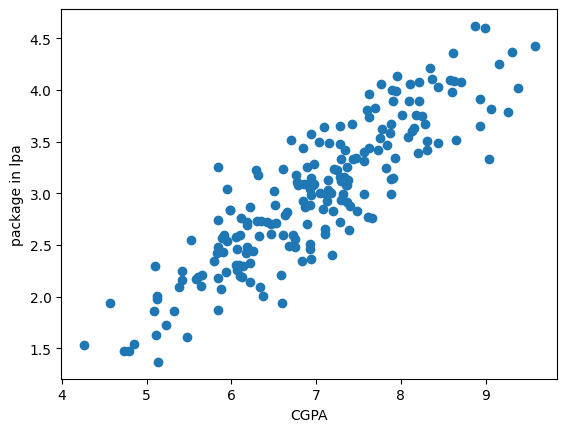

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('package in lpa')


In [6]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [7]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [16]:
y_test

,package
112,4.10
29,3.49
182,2.08
199,2.33
193,1.94
85,1.48
10,1.86
54,3.09
115,4.21
35,2.87


In [18]:
lr.predict(x_test.iloc[2].values.reshape(1,1))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'package in lpa')

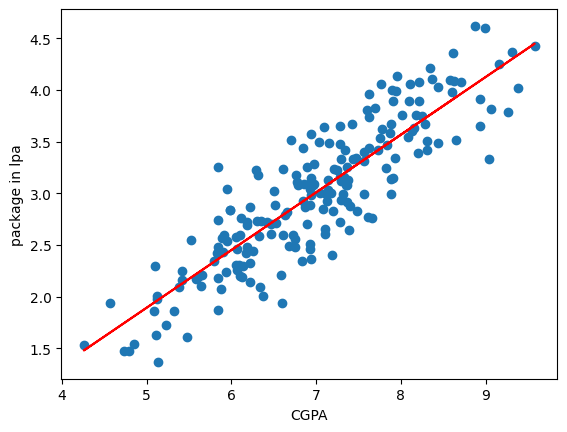

In [22]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.xlabel('CGPA')
plt.ylabel('package in lpa')


In [24]:
m = lr.coef_   # it gives the slop of the line

In [25]:
b = lr.intercept_  # it gives y intercept

In [26]:
m * 8.58 + b

array([3.89111601])

In [27]:
m * 9.5 + b

array([4.40443183])

In [28]:
m * 100 + b

array([54.89908542])

In [29]:
# y = m*x + b
# package = m * cgpa + b

In [62]:
class MeraLR:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,y_train):

    num =0   # num = numerator
    den = 0  # den = denominator


    for i in range(X_train.shape[0]):

      num= num+(X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())
      den = den + ((X_train[i] - X_train.mean()) *(X_train[i]-X_train.mean()))

    self.m = num/den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m)
    print(self.b)

  def predict(self,x_test):
    return self.m * x_test  +  self.b

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv("/placement (1).csv")

In [33]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [35]:
x = df.iloc[:,0].values
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [37]:
y = df.iloc[:,1].values
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_teat,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [39]:
x_train.shape

(160,)

In [49]:
lr = MeraLR()

In [45]:
lr.fit(x_train,y_train)

In [48]:
x_test.iloc[0]

,112
cgpa,8.58


In [50]:
x_train.mean()

np.float64(6.989937500000001)

In [67]:
lr.fit(x_train,y_train)

0.5579519734250721
-0.8961119222429152


In [68]:
x_train.shape[0]

160

In [70]:
print(lr.predict(x_test.iloc[0].values[0]))

3.891116009744203


In [ ]:
# this can be use for only simple linear regression
# not for multiple linear regression.

In [ ]:
class MeraLR:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,x_train,y_train):
    num = 0
    den = 0


    for i in range(x_train.shape[0]):